In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('train.csv',encoding='unicode_escape')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [41]:
df.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

since there are very less nan values so we can drop those rows which are nan

In [42]:
df.dropna(inplace=True)

In [43]:
df['Age of User']

0          0-20
1         21-30
2         31-45
3         46-60
4         60-70
          ...  
27476     31-45
27477     46-60
27478     60-70
27479    70-100
27480      0-20
Name: Age of User, Length: 27480, dtype: object

In [44]:
df["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

There are 3 types of sentiments in the dataset

In [45]:
df["Age of User"].unique()

array(['0-20', '21-30', '31-45', '46-60', '60-70', '70-100'], dtype=object)

In [46]:
age_labels ={'0-20':0, '21-30':20, '31-45':31, '46-60':46, '60-70':60, '70-100':70}
df["Age of User"] = df["Age of User"].map(age_labels)

In [47]:
sentiment_labels ={'negative':1, 'neutral':2, 'positive':3}
df['sentiment']= df['sentiment'].map(sentiment_labels)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  int64  
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  int64  
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  int64  
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


(array([4581.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 4580.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 4579.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 4580.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 4580.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 4580.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.

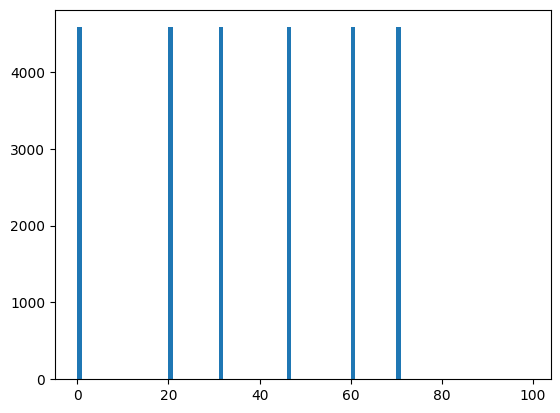

In [48]:
data=df['Age of User']
plt.hist(data, bins=np.arange(data.min(), data.max()+30),)

In [54]:
# There is no significance of this column
df.drop(["textID"],axis=1,inplace=True)

In [55]:
df.head()

,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,"I`d have responded, if I were going","I`d have responded, if I were going",2,morning,0,Afghanistan,38928346,652860.0,60
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1,noon,20,Albania,2877797,27400.0,105
2,my boss is bullying me...,bullying me,1,night,31,Algeria,43851044,2381740.0,18
3,what interview! leave me alone,leave me alone,1,morning,46,Andorra,77265,470.0,164
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",1,noon,60,Angola,32866272,1246700.0,26
